# AutoEncode => 표현(특징)학습
---
- 데이터에서 주요 특징을 찾아 압축 후 복원하는 학습 모델
- 구성
    - Encoder : 입력 데이터에서 주요 특징 추출 / 압축
    - Decoder : 주요 특징에서 원본 데이터로 복원

In [89]:
from keras.datasets.mnist import load_data
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import set_random_seed, plot_model
from keras.models import save_model, load_model
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')
set_random_seed(42)

# [1] 데이터 준비 및 로딩

In [90]:
(x_train, y_train), (x_test, y_test) = load_data()
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

# [2] 데이터 전처리

In [91]:
# 데이터 스케일링
x_train = x_train / 255.0
x_test = x_test / 255.0

In [92]:
# conv 레이어는 이미지의 채널 정보까지 입력받아야 함
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [93]:
# 검증용 데이터 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  stratify=y_train,
                                                  random_state=42,
                                                  test_size=1 / 6)

In [94]:
x_train.shape, x_test.shape, x_val.shape

((50000, 784), (10000, 784), (10000, 784))

# [3] 모델 구성 및 생성

In [95]:
def model_create(model_name, layer_in):
    model_name = Sequential(name=model_name)
    model_name.add(Dense(layer_in, activation='relu', input_shape=(784,)))
    model_name.add(Dense(784, activation='sigmoid'))
    model_name.compile(loss='mean_squared_error',
                       metrics='accuracy',
                       optimizer='adam')
    return model_name

In [96]:
model_1 = model_create('model_1', 1)
model_2 = model_create('model_2', 2)
model_3 = model_create('model_3', 5)
model_4 = model_create('model_3', 20)
model_5 = model_create('model_3', 1000)

In [97]:
model_5.fit(x_train, x_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0093 - accuracy: 0.0130
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0020 - accuracy: 0.0159
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0014 - accuracy: 0.0170
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0012 - accuracy: 0.0186
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0011 - accuracy: 0.0210
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 9.9273e-04 - accuracy: 0.0220
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 9.3942e-04 - accuracy: 0.0234
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 9.0005e-04 - accuracy: 0.0230
Epoch 9/10
1563/1563 [==============================] - 12s 7ms/step - loss: 8.7095e-04 - accuracy: 0.0238
Epoch 10/10
1563/1563 [==============================] - 12

# [4] 원본 이미지 <=> AE진행된 이미지 비교

In [100]:
pre_out = model_5.predict(x_test[0].reshape(-1, 784))

1/1 [==============================] - 0s 16ms/step


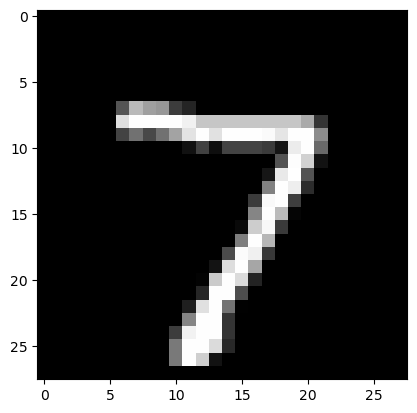

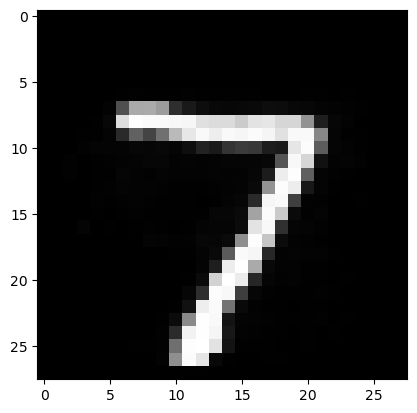

In [101]:
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.show()

plt.imshow(pre_out.reshape(28, 28), cmap='gray')
plt.show()